#            TERCER DESAFÍO DH - GRUPO 7

### Integrantes Grupo:
    Daniela Rodriguez Golpe
    Mercedes Dorado
    Matías Chaves
    Edgar Wendler
    Nashira Calvo

> El objetivo del trabajo es resolver un problema de clasificación con al menos tres modelos de clasificación presentados en el curso.

## OBJETIVOS

Para solucionar el problema de clasificación, se trabajará de la siguiente forma:
<br>
 1. Seleccionar los datos a modelar.<br>
 2. Entrenar al menos tres modelos de clasificación distintos sobre estos datos.<br>
 3. Evaluar la performance de los modelos y comparar ventajas y desventajas de cada uno.<br>
 4. Determinar la importancia de las features incluidas en la predicción. Interpretar.<br>   

## 1. SELECCIONAR LOS DATOS A MODELAR

##### Diccionario de variables incluidas en la base de datos

 |Variable| Descripción| 
 |-------|--------|
 |Index| Index Autogenerado  (no util)| 
 |fixed acidity| valor de acidez| 
 |volatile acidity| valor de acidez volátil| 
 |citric acid| contenido de ácido cítrico| 
 |residual sugar| contenido  de azúcares residuales| 
 |chlorides| contenido de cloruros| 
 |free sulfur dioxide| contenido de dióxido de azufre libre| 
 |total sulfur dioxide| contenido de dióxido de azufre total | 
 |density| densidad | 
 |pH| valor de pH | 
 |sulphates| contenido de sulfatos | 
 |alcohol| graduación alcohólica | 
 |quality | score de calidad entre 0 y 10 |
 |id |  |
 
 
 
El presente dataset está relacionado a las variantes rojas de "Vinho Verde" de origen portugués. El dataset describe distintas sustancias químicas que se encuentran en el vino y sus efectos en la calidad medido a través de un score. Se observa que las clases están ordenadas pero no balanceadas (por ejemplo: hay mayor cantidad de vinos normales que excelentes o pobres). El objetivo es desarrollar un modelo que permita predecir la calidad del vino utilizando el presente dataset.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re


In [2]:
#Importando base de datos
data = pd.read_csv('data/WineQT.csv')
data.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [3]:
#La base de datos contiene 1143 entradas con 13 columnas en donde todas contienen información util para el analisis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
#Las columnas contenidas en la base de datos, estas ya  estan explicadas en el diccionario que armamos
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
# Es una base datos con grandes cantidades de valores unicos por variable.
data.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

In [6]:
data['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [7]:
#Calculamos la hipotesis nula
data['quality'].value_counts().head(1)/len(data['quality'])

5    0.422572
Name: quality, dtype: float64

In [8]:
#EVALUAMOS LA EXISTENCIA DE MISSING VALUES
# CANTIDAD DE MISSING VALUES
data.isna().sum()
#porcentaje de NaN en la base de datos
data.isna().sum()/data.shape[0]
#print(len('datapro'))

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'Id'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

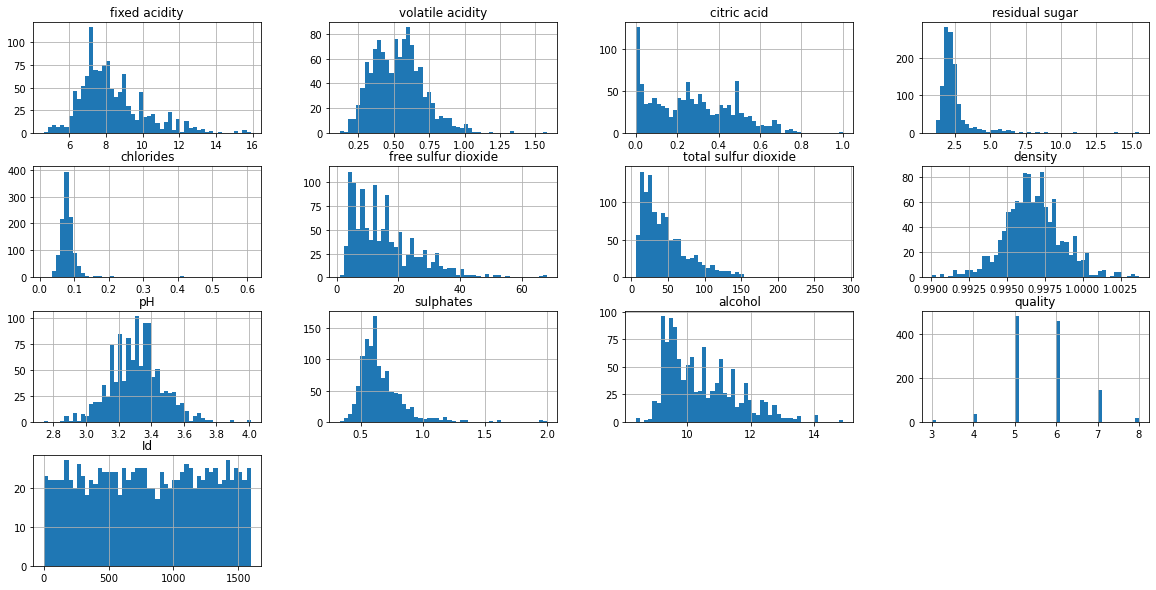

In [9]:
data.hist(bins=50,figsize=(20,10))
# En la base de datos existe un gran problema de outliers, los histogramas se muestran hacia la izquiera
# La unica variable que parece no tener grandes problemas es rooms, pero recodemos que tiene muy poca información.

## 2. ENTRENAMIENTO DE DISTINTOS MODELOS DE CLASIFICACIÓN

### 2.1 KNN

In [10]:
# Volcamos los datos a un DataFrame. No seleccionamos la variable id ya que aporta valor predictivo
X = pd.DataFrame(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])
y = data['quality']
print(X.head())
y.head()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [11]:
# Utilizamos sklearn para estandarizar la matriz de features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
print('Hay', y_train.shape[0], 'datos de entrenamiento y', y_test.shape[0], 'datos de testeo')

Hay 857 datos de entrenamiento y 286 datos de testeo


In [13]:
# Verificamos que las variables ahora tengan media 0 y desvío 1.
print('Medias:', np.mean(X_train, axis=0).round(2))
print('Desvio:', np.std(X_train, axis=0).round(2))

Medias: [-0.02  0.01 -0.02  0.01  0.02  0.01 -0.01 -0.02 -0.01 -0.02  0.  ]
Desvio: [0.99 1.02 0.99 1.03 1.08 1.01 0.96 1.01 1.   0.99 1.01]


In [14]:
# Importamos la clase KNeighborsClassifier de módulo neighbors
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Instanciamos el modelo especificando el valor deseado de k con el argumento n_neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
# Ajustamos a los datos de entrenamiento
knn.fit(X_train, y_train);

KNN no se encarga de estimar ningún parámetro (como los $\beta$ de la regresión lineal, por ejemplo). Otra diferencia con respecto a los modelos que hemos estudiado hasta ahora es que KNN requiere comparar cada dato de <i>test</i> contra <b>todos</b> los datos de <i>train</i> para poder detectar los vecinos más cercanos (lo cual lo hace un tanto costoso cuando estamos trabajando con datasets de gran tamaño). Por estos motivos, decimos que KNN pertence a la clase de modelos <b>no paramétricos basados en instancias</b>.

Podemos visualizar las "áreas de influencia" de cada clase, que delimitan lo que formalmente se conoce como **fronteras de decisión**: 

In [17]:
# Predecimos etiquetas para los datos de test
y_pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5734265734265734

Text(0, 0.5, 'Cross Validation Accuracy')

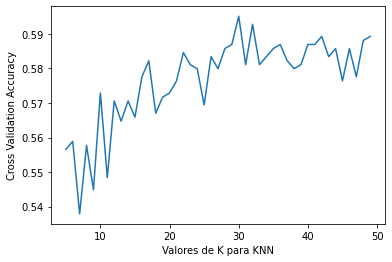

In [19]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
k_range=range(5,50)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier (n_neighbors=k)
    scores=cross_val_score (knn, X_train, y_train, cv=4, scoring="accuracy")
    k_scores.append (scores.mean())

plt.plot (k_range, k_scores)
plt.xlabel( "Valores de K para KNN")
plt.ylabel("Cross Validation Accuracy")

Observamos que al aumentar el número de vecinos, el accuracy mejora

In [20]:
#GridSearchCV 
from sklearn.model_selection import GridSearchCV
k_range=range(5,50)
knn=KNeighborsClassifier()

weight_options=('uniform', 'distance')
metric_options=('minkowski', 'chebyshev')
param_grid = dict (n_neighbors=k_range, weights=weight_options,metric=metric_options)
grid= GridSearchCV (knn, param_grid, cv=4, scoring="accuracy")
grid.fit (X_train,y_train)


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': range(5, 50),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [21]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_metric', 'param_n_neighbors', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [22]:
display(grid.best_estimator_,grid.best_score_,grid.best_params_)


KNeighborsClassifier(n_neighbors=49, weights='distance')

0.6569278417735275

{'metric': 'minkowski', 'n_neighbors': 49, 'weights': 'distance'}

Calculo de accuracy con el dataframe de testeo:

In [23]:
knn_final = KNeighborsClassifier(metric='minkowski', n_neighbors=49, weights='distance')
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)
accuracy_score(y_test, y_pred)

0.6398601398601399

El accuracy obtenido es de 0,65 para el dataset de entrenamiento y 0,64 para el de testeo. 
Concluimos que el modelo tiene capacidad predictiva ya que nuestra hipótesis nula es de 0,42

### 2.2 Regresión logística

In [24]:
from sklearn.linear_model import LogisticRegression
# Instanciamos un objeto de esa clase
logistic_regression = LogisticRegression(penalty='none', solver='newton-cg')
# Ajustamos esta instancia con los datos de entrenamiento
logistic_regression.fit(X_train, y_train)
#Calculamos el accuracy score
y_pred = logistic_regression.predict(X_test)
accuracy_score(y_test, y_pred)


0.5594405594405595

Asociamos el bajo rendimiento del modelo a que nuestras variables siguen una distribución normal y este modelo ajusta de manera lineal.

### 2.3 Naive Bayes

Seleccionamos GaussianNB ya que las variables features siguen una distribución normal

In [25]:
from sklearn.naive_bayes import GaussianNB
# Instanciamos un objeto de esa clase
NB_Gauss = GaussianNB()
# Ajustamos esta instancia con los datos de entrenamiento
NB_Gauss.fit(X_train, y_train)
#Calculamos el accuracy score
y_pred = NB_Gauss.predict(X_test)
accuracy_score(y_test, y_pred)

0.48951048951048953

Asociamos el bajo rendimiento del modelo a problemas de realación entre variables.


### 2.4 Reevaluación de los modelos disminuyendo la cantidad de categorías

La propuesta para este inciso será comparar el rendimiento de los modelos si disminuimos la cantidad de categorías en nuestra variable target.

In [26]:
y.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Divimos en tres categorías:
1. Insuficiente: Esta categoría incluirá las puntuaciones 3 y 4
2. Regular: Puntuaciones 5 y 6
3. Excelente: Puntuaciones 7 y 8

In [27]:
y2 = y.apply(lambda x: 1 if x == 3 else 1 if x == 4 else 2 if x == 5 else 2 if x == 6 else 3 if x == 7 else 3 if x == 8 else 0)
y2.value_counts()

2    945
3    159
1     39
Name: quality, dtype: int64

De esta forma reducimos la cantidad de categorías a la mitad

In [28]:
#Nuestra nueva hipótesis nula es:
print(945/(945+159+39))

0.8267716535433071


#### KNN
Utilizaremos el modelo con los mejores hiperparámetros

In [29]:
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, random_state=5)
print('Hay', y_train2.shape[0], 'datos de entrenamiento y', y_test2.shape[0], 'datos de testeo')

Hay 857 datos de entrenamiento y 286 datos de testeo


In [30]:
knn2 = KNeighborsClassifier(metric='minkowski', n_neighbors=49, weights='distance')
knn2.fit(X_train, y_train2)
y_pred2 = knn2.predict(X_test)
accuracy_score(y_test2, y_pred2)

0.8496503496503497

El accuracy obtenido es de 0,850 para el dataset de de testeo. 
Concluimos que modificar la cantidad de clases no mejoró significativamente la capacidad predictiva de nuestro modelo ya que nuestra hipótesis nula es de 0,827

#### Regresión logística

In [31]:
# Instanciamos un objeto de esa clase
logistic_regression = LogisticRegression(penalty='none', solver='newton-cg')
# Ajustamos esta instancia con los datos de entrenamiento
logistic_regression.fit(X_train, y_train2)
#Calculamos el accuracy score
y_pred2 = logistic_regression.predict(X_test)
accuracy_score(y_test2, y_pred2)


0.8216783216783217

El accuracy obtenido es de 0,822 para el dataset de testeo. 
Concluimos que modificar la cantidad de clases no mejoró significativamente la capacidad predictiva de nuestro modelo ya que nuestra hipótesis nula es de 0,827

#### Naive Bayes

In [32]:
# Instanciamos un objeto de esa clase
NB_Gauss = GaussianNB()
# Ajustamos esta instancia con los datos de entrenamiento
NB_Gauss.fit(X_train, y_train2)
#Calculamos el accuracy score
y_pred2 = NB_Gauss.predict(X_test)
accuracy_score(y_test2, y_pred2)

0.7482517482517482

El accuracy obtenido es de 0,748 para el dataset de testeo. 
Concluimos que modificar la cantidad de clases no mejoró significativamente la capacidad predictiva de nuestro modelo ya que nuestra hipótesis nula es de 0,827

## 3. EVALUAR LA PERFORMANCE DE LOS MODELOS Y COMPARAR VENTAJAS Y DESVENTAJAS DE CADA UNO

Se aplicaron al dataset los modelos KNN, regresión logística y Naive Bayes en una primera instancia utilizando todas las categorías de la variable target y en una segunda instancia disminuyendo la cantidad de categorías en nuestra variable target.

|Modelo| accuracy_score|H0 
 |-------|--------|--------|
 |Modelos con todas las categorías|||
 |KNN|0.640|0.420| 
 |Regresión logística|0.559|0.420| 
 |Naive Bayes| 0.490|0.420|
 |Modelos con categorías reducidas|||
 |KNN| 0.849|0.827| 
 |Regresión logística|0.822|0.827|
 |Naive Bayes|0.748|0.827| 
 
 
Comparando los resultados obtenidos concluimos que el mejor modelo a aplicar en este dataset es el de KNN. Si bien el accurancy score aumenta con la reducción de categorías de la variable target en todos los modelos, no se observa un aumento significativo del accuracy score respecto a la hipótesis nula, por lo que se concluye que reducir las categorías de la variable target no  incrementaría la capacidad predictiva del modelo. 

## 4. DETERMINAR LA IMPORTANCIA DE LAS FEATURES INCLUIDAS EN LA PREDICCIÓN

In [33]:
## 4. DETERMINAR LA IMPORTANCIA DE LAS FEATURES INCLUIDAS EN LA PREDICCIÓN PARA EL MODELO LOGIT
# Importamos la api.
import statsmodels.api as sm
import statsmodels.stats.api as sms
# Importamos algunas librerias para graficar.
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


In [34]:
#convertimos el output entre 0 y 1
y_01= y/np.linalg.norm(y)
X_train, X_test, y01_train, y01_test = train_test_split(X, y_01, random_state=5)

In [35]:
# Instanciamos el modelo y lo entrenamos
log_reg = sm.Logit(y01_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.691422
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                  857
Model:                          Logit   Df Residuals:                      846
Method:                           MLE   Df Model:                           10
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                     inf
Time:                        20:30:35   Log-Likelihood:                -592.55
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0504      0.191      0.264      0.792      -0.323       0.424
x2             0.0015      0.

C:\Users\Mati-PC\.conda\envs\dhdsblend2021\lib\site-packages\statsmodels\discrete\discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


Las  variables no son significativas, el accuracy del modelo logit no es el ideal para este tipo de información.
Se observa que, residual sugar, chlorides, free sulfur dioxide afectan de manera negativa a la calidad del vino verde.